# Credit Risk Modeling – Feature Engineering & Modeling

This notebook is part of an end-to-end credit risk modeling project completed
during my Data Science Internship at HDFC Capital Advisors Ltd.

⚠️ Note: Due to data confidentiality, raw datasets are not included.
The notebook demonstrates methodology, feature engineering logic,
modeling approach, and evaluation techniques.

In [ ]:
import pandas as pd

# Load Dataset

##### TRAIN SET

In [3]:
train = pd.read_csv("./data/df_train.csv")

In [4]:
train = train.drop(columns='accList_loan_status')

In [5]:
df_train = train.copy()

In [6]:
df_train["TARGET"].value_counts()

TARGET
0    205805
1     17185
Name: count, dtype: int64

In [7]:
df_train["TARGET"].mean()

0.07706623615408763

In [8]:
og_flag = train[["uid","TARGET"]].copy()

In [9]:
train.shape

(222990, 160)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222990 entries, 0 to 222989
Columns: 160 entries, uid to accList_most_frequent_credit_type
dtypes: float64(104), int64(54), object(2)
memory usage: 272.2+ MB


In [11]:

train[train.select_dtypes(include=['object']).columns]

,uid,accList_most_frequent_credit_type
0,XDA69787158,Credit card
1,BSE47789733,Consumer credit
2,NTJ92213825,Consumer credit
3,TCQ47571695,Consumer credit
4,FZI10689602,Consumer credit
...,...,...
222985,SWK95839200,Consumer credit
222986,NDO00278120,Consumer credit
222987,LDY78194712,Consumer credit
222988,EVH98380736,Mortgage


In [12]:
x = train.columns.to_list()
x

['uid',
 'TARGET',
 'enqList_Avg_amount_enquired',
 'enqList_max_amount_enquired',
 'enqList_min_amount_enquired',
 'enqList_total_enquiries_per_customer',
 'enqList_unique_enquiry_types_per_customer',
 'enqList_Another type of loan_total_enquiries',
 'enqList_Car loan_total_enquiries',
 'enqList_Cash loan (non-earmarked)_total_enquiries',
 'enqList_Cash loans_total_enquiries',
 'enqList_Consumer credit_total_enquiries',
 'enqList_Credit card_total_enquiries',
 'enqList_Interbank credit_total_enquiries',
 'enqList_Loan for business development_total_enquiries',
 'enqList_Loan for purchase of shares (margin lending)_total_enquiries',
 'enqList_Loan for the purchase of equipment_total_enquiries',
 'enqList_Loan for working capital replenishment_total_enquiries',
 'enqList_Microloan_total_enquiries',
 'enqList_Mobile operator loan_total_enquiries',
 'enqList_Mortgage_total_enquiries',
 'enqList_Real estate loan_total_enquiries',
 'enqList_Revolving loans_total_enquiries',
 'enqList_Unknow

##### TEST SET

In [13]:
test = pd.read_csv("/Users/aaniaadap/Desktop/HDFC Internship/df_test.csv")

In [14]:
test.shape

(39417, 151)

In [15]:
test_target=pd.read_csv('/Users/aaniaadap/Desktop/HDFC Internship/Monsoon Project/senior_ds_test/data/test/target.csv')

In [16]:
test=test.merge(test_target,on='uid',how='inner')

In [17]:
test = test.drop(columns="accList_loan_status")

In [18]:
df_test = test.copy()

In [19]:
test.shape

(39417, 151)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39417 entries, 0 to 39416
Columns: 151 entries, uid to TARGET
dtypes: float64(95), int64(54), object(2)
memory usage: 45.4+ MB


In [21]:
test.select_dtypes(include=['object']).columns

Index(['uid', 'accList_most_frequent_credit_type'], dtype='object')

In [22]:
y = test.columns.to_list()
y

['uid',
 'enqList_Avg_amount_enquired',
 'enqList_max_amount_enquired',
 'enqList_min_amount_enquired',
 'enqList_total_enquiries_per_customer',
 'enqList_unique_enquiry_types_per_customer',
 'enqList_Another type of loan_total_enquiries',
 'enqList_Car loan_total_enquiries',
 'enqList_Cash loan (non-earmarked)_total_enquiries',
 'enqList_Cash loans_total_enquiries',
 'enqList_Consumer credit_total_enquiries',
 'enqList_Credit card_total_enquiries',
 'enqList_Interbank credit_total_enquiries',
 'enqList_Loan for business development_total_enquiries',
 'enqList_Loan for purchase of shares (margin lending)_total_enquiries',
 'enqList_Loan for the purchase of equipment_total_enquiries',
 'enqList_Loan for working capital replenishment_total_enquiries',
 'enqList_Microloan_total_enquiries',
 'enqList_Mobile operator loan_total_enquiries',
 'enqList_Mortgage_total_enquiries',
 'enqList_Real estate loan_total_enquiries',
 'enqList_Revolving loans_total_enquiries',
 'enqList_Unknown type of l

In [23]:
set(x) - set(y)

{'accList_Interbank credit_mean_loan',
 'accList_Interbank credit_median_loan',
 'accList_Interbank credit_total_loan',
 'accList_Loan for purchase of shares (margin lending)_mean_loan',
 'accList_Loan for purchase of shares (margin lending)_median_loan',
 'accList_Loan for purchase of shares (margin lending)_total_loan',
 'accList_Mobile operator loan_mean_loan',
 'accList_Mobile operator loan_median_loan',
 'accList_Mobile operator loan_total_loan'}

In [24]:
missing_cols = set(x) - set(y)
for col in missing_cols:
    test[col] = 0

In [25]:
set(train.columns.to_list()) - set(test.columns.to_list())

set()

In [26]:
test.shape

(39417, 160)

In [27]:
test["TARGET"].mean()

0.07849405079026815


## DISTRIBUTION

In [28]:
train.describe()

,TARGET,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,...,accList_Interbank credit_total_loan,accList_Loan for business development_total_loan,accList_Loan for purchase of shares (margin lending)_total_loan,accList_Loan for the purchase of equipment_total_loan,accList_Loan for working capital replenishment_total_loan,accList_Microloan_total_loan,accList_Mobile operator loan_total_loan,accList_Mortgage_total_loan,accList_Real estate loan_total_loan,accList_Unknown type of loan_total_loan
count,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,222990.000000,...,222990.000000,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05,2.229900e+05
mean,0.077066,115896.117343,177397.837329,54448.453016,7.310978,5.099610,0.379228,0.379071,0.379483,1.162079,...,0.060541,9.838802e+03,5.981434e+01,3.344452e+02,2.429403e+03,2.003448e+03,6.659491e+01,3.194980e+05,4.898941e+02,7.640139e+02
std,0.266697,60426.363565,89750.115652,61876.382989,6.999034,3.703636,0.702597,0.703355,0.703789,1.522783,...,28.588481,5.541778e+05,1.890281e+04,5.649548e+04,2.687336e+05,4.126686e+04,3.144733e+04,1.873359e+06,8.972913e+04,5.277017e+04
min,0.000000,1057.000000,1057.000000,1007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,86250.000000,141000.000000,14000.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,104666.670000,179000.000000,31000.000000,5.000000,4.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,127230.770000,194000.000000,74000.000000,10.000000,8.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000,499960.000000,499995.000000,499960.000000,69.000000,17.000000,9.000000,9.000000,8.000000,15.000000,...,13500.000000,1.723050e+08,8.298000e+06,1.732500e+07,1.102500e+08,4.725000e+06,1.485000e+07,1.915112e+08,3.544695e+07,9.000000e+06


In [ ]:
test.describe()

## PREPROCESSING

In [29]:
# Drop the uid column as it is likely not useful for model training
train = train.drop(columns=['uid'])
test = test.drop(columns=['uid'])

## Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['accList_most_frequent_credit_type']

# Combine train and test sets for fitting label encoder
combined_data = pd.concat([train[categorical_columns], test[categorical_columns]])

combined_data = combined_data.astype(str)

label_encoder = LabelEncoder()
for col in categorical_columns:
    label_encoder.fit(combined_data[col]) 
    train[col] = label_encoder.transform(train[col])
    test[col] = label_encoder.transform(test[col])


## Scaling the Data

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols = train.drop(columns=['TARGET']).columns
numerical_cols_test = test.drop(columns=["TARGET"]).columns

scaler.fit_transform(train[numerical_cols])

scaled_train = scaler.transform(train[numerical_cols])
scaled_test = scaler.transform(test[numerical_cols])

# Convert the scaled data back to a DataFrame
train_scaled = pd.DataFrame(scaled_train, columns=numerical_cols)
train_scaled['TARGET'] = train['TARGET']

test_scaled = pd.DataFrame(scaled_test, columns=numerical_cols)
test_scaled["TARGET"]=test["TARGET"]

In [32]:
print("Scaled Training Data:")
train_scaled


Scaled Training Data:


,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,enqList_Consumer credit_total_enquiries,...,accList_Loan for purchase of shares (margin lending)_total_loan,accList_Loan for the purchase of equipment_total_loan,accList_Loan for working capital replenishment_total_loan,accList_Microloan_total_loan,accList_Mobile operator loan_total_loan,accList_Mortgage_total_loan,accList_Real estate loan_total_loan,accList_Unknown type of loan_total_loan,accList_most_frequent_credit_type,TARGET
0,0.269477,0.330588,0.208422,0.014706,0.0625,0.000000,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.3,0
1,0.287183,0.300524,0.262536,0.029412,0.1250,0.000000,0.111111,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
2,0.239411,0.332592,0.014015,0.044118,0.1250,0.000000,0.000000,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
3,0.294532,0.294512,0.294603,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
4,0.169480,0.362656,0.018024,0.250000,0.5625,0.000000,0.000000,0.375,0.200000,0.375,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222985,0.726214,0.938088,0.485078,0.117647,0.3125,0.000000,0.000000,0.000,0.000000,0.250,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
222986,0.177475,0.342614,0.046082,0.205882,0.6875,0.222222,0.000000,0.000,0.133333,0.125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
222987,0.216592,0.378690,0.022032,0.750000,1.0000,0.333333,0.222222,0.750,0.733333,0.125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
222988,0.411250,0.411221,0.411309,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.051694,0.0,0.0,0.8,0


limit_output extension: Maximum message size of 10000 exceeded with 11224 characters

In [33]:
print("\nScaled Test Data:")
test_scaled


Scaled Test Data:


,enqList_Avg_amount_enquired,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer,enqList_Another type of loan_total_enquiries,enqList_Car loan_total_enquiries,enqList_Cash loan (non-earmarked)_total_enquiries,enqList_Cash loans_total_enquiries,enqList_Consumer credit_total_enquiries,...,accList_Loan for purchase of shares (margin lending)_total_loan,accList_Loan for the purchase of equipment_total_loan,accList_Loan for working capital replenishment_total_loan,accList_Microloan_total_loan,accList_Mobile operator loan_total_loan,accList_Mortgage_total_loan,accList_Real estate loan_total_loan,accList_Unknown type of loan_total_loan,accList_most_frequent_credit_type,TARGET
0,0.257451,0.366665,0.026041,0.102941,0.3125,0.000000,0.000000,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.034071,0.0,0.0,0.2,0
1,0.366691,0.366665,0.366754,0.000000,0.0000,0.000000,0.111111,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.3,0
2,0.374708,0.374682,0.374771,0.000000,0.0000,0.000000,0.000000,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
3,0.190017,0.382699,0.022032,0.294118,0.6250,0.000000,0.333333,0.375,0.133333,0.250,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
4,0.221372,0.338605,0.164330,0.073529,0.3125,0.000000,0.000000,0.000,0.066667,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39412,0.253999,0.396729,0.132263,0.117647,0.4375,0.000000,0.000000,0.000,0.000000,0.125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
39413,0.100106,0.100099,0.100196,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.125,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0
39414,0.120550,0.242401,0.044078,0.058824,0.1875,0.222222,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.3,0
39415,0.184577,0.298520,0.012011,0.088235,0.3750,0.111111,0.000000,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,1


limit_output extension: Maximum message size of 10000 exceeded with 11040 characters

# Feature Selection

In [34]:
x = train_scaled.drop(columns='TARGET')
y = train_scaled["TARGET"]

In [35]:
test_x = test_scaled.drop(columns='TARGET')
test_y = test_scaled["TARGET"]

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [37]:
y_test.mean()*100

7.587784205569756

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['accList_most_frequent_credit_type']
numerical_columns = x_train.columns.difference(categorical_columns)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', SimpleImputer(strategy='mean'), numerical_columns)
    ]
)
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)
test_x = preprocessor.transform(test_x)

In [39]:
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
feature_names_num = numerical_columns.tolist()

feature_names = np.concatenate([feature_names_cat, feature_names_num])

x_train_df = pd.DataFrame(x_train, columns=feature_names)
x_test_df = pd.DataFrame(x_test, columns=feature_names)
test_x_df = pd.DataFrame(test_x, columns=feature_names)

In [40]:
print("Transformed Training DataFrame:")
(x_train_df.head())


Transformed Training DataFrame:


,accList_most_frequent_credit_type_0.0,accList_most_frequent_credit_type_0.1,accList_most_frequent_credit_type_0.2,accList_most_frequent_credit_type_0.30000000000000004,accList_most_frequent_credit_type_0.4,accList_most_frequent_credit_type_0.5,accList_most_frequent_credit_type_0.6000000000000001,accList_most_frequent_credit_type_0.7000000000000001,accList_most_frequent_credit_type_0.8,accList_most_frequent_credit_type_0.9,...,enqList_Unknown type of loan_total_enquiry_amt,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.138787,0.1,0.095238,0.121212,0.095238,0.075472,0.884553,0.043826,0.117647,0.50
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.030303,0.023810,0.018868,0.096090,0.096187,0.000000,0.00
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.030303,0.023810,0.018868,0.328584,0.328674,0.000000,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.080151,0.1,0.095238,0.060606,0.071429,0.056604,0.326580,0.038066,0.073529,0.25
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.018868,0.332592,0.332683,0.000000,0.00


In [41]:

print("\nTransformed Test DataFrame:")
(x_test_df.head())


Transformed Test DataFrame:


,accList_most_frequent_credit_type_0.0,accList_most_frequent_credit_type_0.1,accList_most_frequent_credit_type_0.2,accList_most_frequent_credit_type_0.30000000000000004,accList_most_frequent_credit_type_0.4,accList_most_frequent_credit_type_0.5,accList_most_frequent_credit_type_0.6000000000000001,accList_most_frequent_credit_type_0.7000000000000001,accList_most_frequent_credit_type_0.8,accList_most_frequent_credit_type_0.9,...,enqList_Unknown type of loan_total_enquiry_amt,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.1,0.047619,0.060606,0.047619,0.037736,0.376686,0.334687,0.029412,0.1250
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015150,0.0,0.000000,0.000000,0.023810,0.018868,0.060013,0.060112,0.000000,0.0000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.080151,0.1,0.095238,0.181818,0.142857,0.150943,0.370673,0.028045,0.176471,0.5000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010263,0.2,0.142857,0.151515,0.166667,0.150943,0.352635,0.020028,0.132353,0.4375
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.047619,0.030303,0.023810,0.037736,0.951385,0.213822,0.029412,0.1250


In [42]:
print("\nOriginal Transformed Test DataFrame:")
(test_x_df.head())


Original Transformed Test DataFrame:


,accList_most_frequent_credit_type_0.0,accList_most_frequent_credit_type_0.1,accList_most_frequent_credit_type_0.2,accList_most_frequent_credit_type_0.30000000000000004,accList_most_frequent_credit_type_0.4,accList_most_frequent_credit_type_0.5,accList_most_frequent_credit_type_0.6000000000000001,accList_most_frequent_credit_type_0.7000000000000001,accList_most_frequent_credit_type_0.8,accList_most_frequent_credit_type_0.9,...,enqList_Unknown type of loan_total_enquiry_amt,enqList_enquiries_last_1_month,enqList_enquiries_last_3_months,enqList_enquiries_last_6_months,enqList_enquiries_last_9_months,enqList_enquiries_last_year,enqList_max_amount_enquired,enqList_min_amount_enquired,enqList_total_enquiries_per_customer,enqList_unique_enquiry_types_per_customer
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006842,0.0,0.000000,0.030303,0.071429,0.094340,0.366665,0.026041,0.102941,0.3125
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.366665,0.366754,0.000000,0.0000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.374682,0.374771,0.000000,0.0000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.1,0.190476,0.212121,0.238095,0.226415,0.382699,0.022032,0.294118,0.6250
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041053,0.0,0.095238,0.121212,0.119048,0.094340,0.338605,0.164330,0.073529,0.3125


## SMOTE

In [45]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_df, y_train)

## RFE

In [56]:
import lightgbm as lgb
from sklearn.feature_selection import RFE

lgb_model = lgb.LGBMClassifier()

rfe = RFE(estimator=lgb_model, n_features_to_select=50, step=5)

rfe.fit(x_train_smote, y_train_smote)


X_train_rfe = rfe.transform(x_train_smote)
X_test_rfe = rfe.transform(x_test_df)
test_x_rfe = rfe.transform(test_x_df)

[LightGBM] [Info] Number of positive: 185198, number of negative: 185198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34321
[LightGBM] [Info] Number of data points in the train set: 370396, number of used features: 151
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 185198, number of negative: 185198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34063
[LightGBM] [Info] Number of data points in the train set: 370396, number of used features: 149
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> ini

[LightGBM] [Info] Number of positive: 185198, number of negative: 185198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21155
[LightGBM] [Info] Number of data points in the train set: 370396, number of used features: 83
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 185198, number of negative: 185198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19880
[LightGBM] [Info] Number of data points in the train set: 370396, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> inits

limit_output extension: Maximum message size of 10000 exceeded with 10154 characters

In [58]:
# Print selected features
selected_features = x_train_smote.columns[rfe.support_].tolist()
print("Selected Features:")
for feature in selected_features:
    print(f"- {feature}")

# Optionally, you can also get dropped features
dropped_features = x_train_df.columns[~rfe.support_].tolist()
print("\nDropped Features:")
for feature in dropped_features:
    print(f"- {feature}")


Selected Features:
- accList_Consumer credit_mean_loan
- accList_Consumer credit_total_loan
- accList_Credit card_mean_loan
- accList_Credit card_median_loan
- accList_Credit card_total_loan
- accList_Microloan_mean_loan
- accList_avg_DPD
- accList_avg_loan_amount
- accList_avg_ontime_payments
- accList_earliest_acc_day
- accList_earliest_acc_month
- accList_earliest_acc_year
- accList_latest_acc_day
- accList_latest_acc_month
- accList_latest_acc_year
- accList_max_duration_months
- accList_max_late_payments
- accList_max_loan_amt
- accList_median_loan_amount
- accList_median_payments
- accList_min_consecutive_late_payments
- accList_min_duration_months
- accList_min_loan_amt
- accList_min_ontime_payments
- accList_min_payments
- accList_total_duration_months
- enqList_Another type of loan_mean_enquiry_amt
- enqList_Another type of loan_total_enquiries
- enqList_Avg_amount_enquired
- enqList_Car loan_mean_enquiry_amt
- enqList_Car loan_total_enquiries
- enqList_Cash loans_mean_enquiry

In [59]:
feature_names = x_train_smote.columns

# Print feature rankings and names
print("Feature Rankings:")
for rank, name in sorted(zip(rfe.ranking_, feature_names)):
    print(f"Rank {rank}: {name}")

Feature Rankings:
Rank 1: accList_Consumer credit_mean_loan
Rank 1: accList_Consumer credit_total_loan
Rank 1: accList_Credit card_mean_loan
Rank 1: accList_Credit card_median_loan
Rank 1: accList_Credit card_total_loan
Rank 1: accList_Microloan_mean_loan
Rank 1: accList_avg_DPD
Rank 1: accList_avg_loan_amount
Rank 1: accList_avg_ontime_payments
Rank 1: accList_earliest_acc_day
Rank 1: accList_earliest_acc_month
Rank 1: accList_earliest_acc_year
Rank 1: accList_latest_acc_day
Rank 1: accList_latest_acc_month
Rank 1: accList_latest_acc_year
Rank 1: accList_max_duration_months
Rank 1: accList_max_late_payments
Rank 1: accList_max_loan_amt
Rank 1: accList_median_loan_amount
Rank 1: accList_median_payments
Rank 1: accList_min_consecutive_late_payments
Rank 1: accList_min_duration_months
Rank 1: accList_min_loan_amt
Rank 1: accList_min_ontime_payments
Rank 1: accList_min_payments
Rank 1: accList_total_duration_months
Rank 1: enqList_Another type of loan_mean_enquiry_amt
Rank 1: enqList_Anot

In [60]:
feature_rankings = rfe.ranking_

# Get list of feature names
feature_names = x_train_smote.columns

# Create a DataFrame to store feature names and their ranks
feature_ranks_df = pd.DataFrame({
    'Feature': feature_names,
    'Rank': feature_rankings
})

# Filter features where rank is less than or equal to 5
selected_features_top5 = feature_ranks_df[feature_ranks_df['Rank'] <= 5]

# Sort by rank to maintain the order
selected_features_top5 = selected_features_top5.sort_values(by='Rank')

# Extract the feature names with ranks up to 5
selected_feature_names = selected_features_top5['Feature'].tolist()

# Display selected feature names and their ranks
print("Selected Features (up to Rank 5):")
selected_features_top5

Selected Features (up to Rank 5):


,Feature,Rank
20,accList_Consumer credit_mean_loan,1
88,accList_min_payments,1
89,accList_total_duration_months,1
90,enqList_Another type of loan_mean_enquiry_amt,1
166,enqList_total_enquiries_per_customer,1
...,...,...
131,enqList_Loan for working capital replenishment...,5
75,accList_max_del_payments,5
80,accList_max_payments,5
101,enqList_Cash loan (non-earmarked)_total_enquiries,5


In [52]:
len(selected_feature_names)

68

# MODELS

In [61]:
x_train = x_train_smote[selected_feature_names]
x_test = x_test_df[selected_feature_names]
test_x = test_x_df[selected_feature_names]

## LOGISTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=2000, solver='saga')


# Fit the model on the training data
logreg_model.fit(x_train, y_train_smote)

# Calculate AUC score (assuming you have y_test and predicted probabilities)
from sklearn.metrics import roc_auc_score

y_pred = logreg_model.predict_proba(x_test)[:, 1]  # Assuming binary classification
auc_score = roc_auc_score(y_test, y_pred)

print("AUC score:", auc_score)

AUC score: 0.6459152660030486


### Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV

params= {
    'C':[1,10,100],
         'max_iter':[1000,2000],
         'solver':["saga"]
}

clf = GridSearchCV(logreg_model, param_grid = params, cv=5, verbose = 3,scoring='roc_auc',return_train_score=False)

clf.fit(x_train, y_train_smote)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...C=1, max_iter=1000, solver=saga;, score=0.658 total time=  10.8s
[CV 2/5] END ...C=1, max_iter=1000, solver=saga;, score=0.669 total time=  10.6s
[CV 3/5] END ...C=1, max_iter=1000, solver=saga;, score=0.670 total time=  10.6s
[CV 4/5] END ...C=1, max_iter=1000, solver=saga;, score=0.666 total time=  10.7s
[CV 5/5] END ...C=1, max_iter=1000, solver=saga;, score=0.668 total time=  10.4s
[CV 1/5] END ...C=1, max_iter=2000, solver=saga;, score=0.658 total time=  10.3s
[CV 2/5] END ...C=1, max_iter=2000, solver=saga;, score=0.669 total time=  10.7s
[CV 3/5] END ...C=1, max_iter=2000, solver=saga;, score=0.670 total time=  10.5s
[CV 4/5] END ...C=1, max_iter=2000, solver=saga;, score=0.666 total time=  10.2s
[CV 5/5] END ...C=1, max_iter=2000, solver=saga;, score=0.668 total time=  10.5s
[CV 1/5] END ..C=10, max_iter=1000, solver=saga;, score=0.663 total time=  51.0s
[CV 2/5] END ..C=10, max_iter=1000, solver=saga;,

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000, solver='saga'),
             param_grid={'C': [1, 10, 100], 'max_iter': [1000, 2000],
                         'solver': ['saga']},
             scoring='roc_auc', verbose=3)

In [65]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.572674,0.116235,0.036549,0.007234,1,1000,saga,"{'C': 1, 'max_iter': 1000, 'solver': 'saga'}",0.658181,0.668900,0.669767,0.666344,0.668103,0.666259,0.004194,5
1,10.386566,0.179389,0.039441,0.011492,1,2000,saga,"{'C': 1, 'max_iter': 2000, 'solver': 'saga'}",0.658181,0.668899,0.669767,0.666344,0.668103,0.666259,0.004194,6
2,50.106455,0.547706,0.034987,0.002170,10,1000,saga,"{'C': 10, 'max_iter': 1000, 'solver': 'saga'}",0.663277,0.673792,0.674829,0.671439,0.672896,0.671247,0.004137,3
3,50.222746,0.413943,0.036421,0.001223,10,2000,saga,"{'C': 10, 'max_iter': 2000, 'solver': 'saga'}",0.663277,0.673792,0.674829,0.671439,0.672896,0.671247,0.004137,4
4,138.820383,4.691928,0.043987,0.013143,100,1000,saga,"{'C': 100, 'max_iter': 1000, 'solver': 'saga'}",0.667251,0.677504,0.678686,0.675408,0.676569,0.675084,0.004062,2
5,138.608351,5.234929,0.036863,0.001391,100,2000,saga,"{'C': 100, 'max_iter': 2000, 'solver': 'saga'}",0.667251,0.677504,0.678686,0.675408,0.676569,0.675084,0.004062,1


In [66]:
print("Best parameters found: ", clf.best_params_)
print("Best cross-validation score: ", clf.best_score_)

Best parameters found:  {'C': 100, 'max_iter': 2000, 'solver': 'saga'}
Best cross-validation score:  0.6750835537233361


##### Predict on Test Set and Calculating the Probability of the Outcome

In [73]:
y_pred_train_lr = clf.best_estimator_.predict(x_train)
y_pred_test_lr = clf.best_estimator_.predict(x_test)
y_pred_og_test_lr = clf.best_estimator_.predict(test_x)

y_pred_train_lr_proba = clf.best_estimator_.predict_proba(x_train)
y_pred_test_lr_proba = clf.best_estimator_.predict_proba(x_test)
y_pred_og_test_proba_lr = clf.best_estimator_.predict_proba(test_x)

In [74]:
print("Predicted class labels for training data:", y_pred_train_lr[:5])
print("Predicted probabilities for training data:\n", y_pred_train_lr_proba[:5])


print("Predicted class labels for test data:", y_pred_test_lr[:20])
print("Predicted probabilities for test data:\n", y_pred_test_lr_proba[:5])


print("Predicted class labels for test data:", y_pred_og_test_lr[:20])
print("Predicted probabilities for test data:\n", y_pred_og_test_proba_lr[:5])

Predicted class labels for training data: [0 0 0 1 0]
Predicted probabilities for training data:
 [[0.6658269  0.3341731 ]
 [0.59970273 0.40029727]
 [0.56006824 0.43993176]
 [0.3195017  0.6804983 ]
 [0.52952823 0.47047177]]
Predicted class labels for test data: [1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
Predicted probabilities for test data:
 [[0.48138412 0.51861588]
 [0.25206614 0.74793386]
 [0.33724601 0.66275399]
 [0.60287245 0.39712755]
 [0.56660854 0.43339146]]
Predicted class labels for test data: [0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1]
Predicted probabilities for test data:
 [[0.57543594 0.42456406]
 [0.35920099 0.64079901]
 [0.49201856 0.50798144]
 [0.40283919 0.59716081]
 [0.61424864 0.38575136]]


#### Feature Importances

In [75]:
coefficients = logreg_model.coef_[0]

# Create a DataFrame to see feature importance
feature_importance_lr = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

# Sort features by their absolute coefficient values
feature_importance_lr['Absolute_Coefficient'] = np.abs(feature_importance_lr['Coefficient'])
feature_importance_lr = feature_importance_lr.sort_values(by='Absolute_Coefficient', ascending=False)
feature_importance_lr.head(20)


,Feature,Coefficient,Absolute_Coefficient
23,enqList_enquiries_last_year,-12.741646,12.741646
4,enqList_total_enquiries_per_customer,11.373460,11.373460
35,accList_avg_loan_amount,-10.154746,10.154746
29,accList_Consumer credit_total_loan,9.728099,9.728099
45,accList_median_loan_amount,-9.662526,9.662526
59,accList_Mortgage_total_loan,-9.099130,9.099130
32,accList_Credit card_total_loan,8.837681,8.837681
26,accList_min_loan_amt,-8.465468,8.465468
64,accList_max_del_payments,-7.479913,7.479913
34,accList_avg_DPD,4.699658,4.699658


In [70]:
test_y=test["TARGET"]

#### AUC-ROC SCORE

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

y_train_prob_lr = y_pred_train_lr_proba[:, 1]
y_test_prob_lr = y_pred_test_lr_proba[:, 1]
y_pred_og_test_prob_lr = y_pred_og_test_proba_lr[:, 1]

train_auc_lr = roc_auc_score(y_train_smote, y_train_prob_lr)
test_auc_lr = roc_auc_score(y_test, y_test_prob_lr)
og_test_auc_lr = roc_auc_score(test_y,y_pred_og_test_prob_lr)

print(f"Train AUC-ROC: {train_auc_lr}")
print(f"Test AUC-ROC: {test_auc_lr}")
print(f"Original Test Dataset AUC-ROC: {og_test_auc_lr}")

Train AUC-ROC: 0.6756621198959437
Test AUC-ROC: 0.6543236644895966
Original Test Dataset AUC-ROC: 0.6546080726789434


#### GINI COEFFICIENT

In [81]:
# gini_coefficient = 2 * roc_auc - 1
gini_train = 2 * train_auc_lr - 1
gini_test =  2 * test_auc_lr - 1
gini_og_test = 2 * og_test_auc_lr - 1

In [82]:
print(f"Gini Coefficient for Train: {gini_train}")
print(f"Gini Coefficient for Test Split: {gini_test}")
print(f"Gini Coefficient for Original Test Dataset: {gini_og_test}")

Gini Coefficient for Train: 0.3513242397918874
Gini Coefficient for Test Split: 0.3086473289791931
Gini Coefficient for Original Test Dataset: 0.3092161453578868


#### KS Statistic

In [84]:
def ks_statistic(y_true, y_pred_proba):
    data = pd.DataFrame({'y_true': y_true, 'y_pred_proba': y_pred_proba})
    data.sort_values(by='y_pred_proba', ascending=False, inplace=True)
    data['cum_event_rate'] = data['y_true'].cumsum() / data['y_true'].sum()
    data['cum_non_event_rate'] = (1 - data['y_true']).cumsum() / (1 - data['y_true']).sum()
    data['ks'] = np.abs(data['cum_event_rate'] - data['cum_non_event_rate'])
    ks_stat = data['ks'].max()
    return ks_stat

ks_stat_train = ks_statistic(y_train_smote,y_train_prob_lr)
ks_stat_test_split = ks_statistic(y_test,y_test_prob_lr)
ks_stat_test_og = ks_statistic(test_y,y_pred_og_test_prob_lr)

In [85]:
print(f"KS Statistic for Train: {ks_stat_train:.4f}")
print(f"KS Statistic for Test Split: {ks_stat_test_split:.4f}")
print(f"KS Statistic for Original Test Dataset: {ks_stat_test_og:.4f}")

KS Statistic for Train: 0.2569
KS Statistic for Test Split: 0.2237
KS Statistic for Original Test Dataset: 0.2248


# PLOTS

## AUC-ROC CURVE

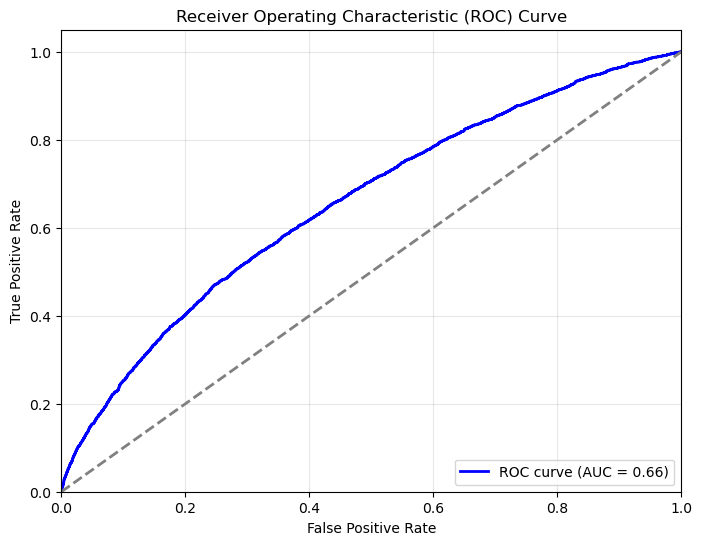

In [66]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(test_y, y_pred_og_test_prob_lr)

# Step 3: Compute the AUC score
auc_score = roc_auc_score(test_y,y_pred_og_test_prob_lr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nTraining Set Evaluation")
print("Accuracy:", accuracy_score(y_train, y_pred_train_lr))
print("Classification Report:\n", classification_report(y_train, y_pred_train_lr))


Training Set Evaluation
Accuracy: 0.9228116856261616
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    185198
           1       0.54      0.00      0.00     15493

    accuracy                           0.92    200691
   macro avg       0.73      0.50      0.48    200691
weighted avg       0.89      0.92      0.89    200691



In [68]:
print("\nTest Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_test_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_test_lr))


Test Set Evaluation
Accuracy: 0.9241221579443024
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     20607
           1       0.00      0.00      0.00      1692

    accuracy                           0.92     22299
   macro avg       0.46      0.50      0.48     22299
weighted avg       0.85      0.92      0.89     22299



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CONFUSION MATRIX

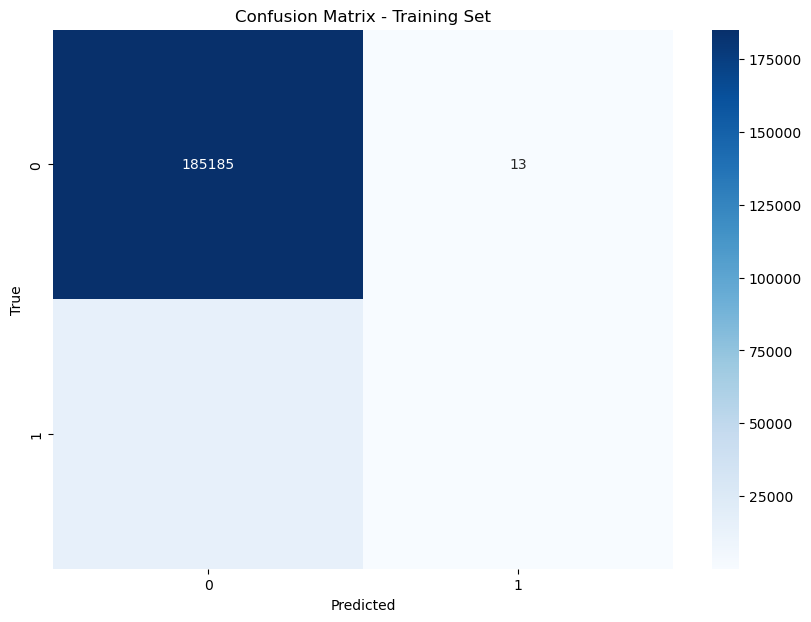

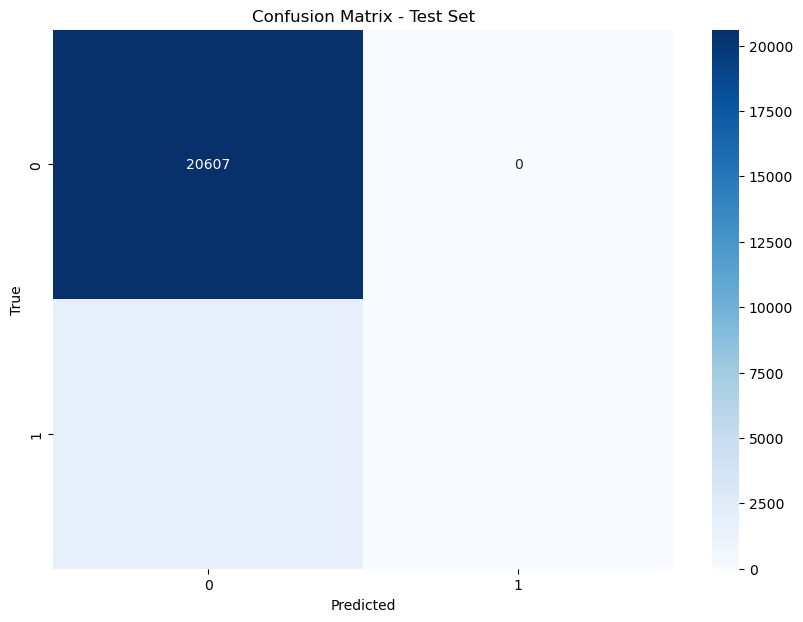

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_train, y_pred_train_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Set')
plt.show()


cm_test = confusion_matrix(y_test, y_pred_test_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()

## Decile Chart

In [258]:
test_y_prob = logreg_model.predict_proba(test_x)[:, 1]
test_y = test_y.reset_index(drop=True)

df = pd.DataFrame({'actual': test_y, 'pred_prob': test_y_prob})


# Rank the data by predicted probabilities in descending order
df = df.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)


df['decile'] = pd.qcut(df['pred_prob'], 10, labels=False)+1
df['decile'] = 11 - df['decile']

df

,actual,pred_prob,decile
0,0,0.467348,1
1,1,0.452057,1
2,0,0.417951,1
3,0,0.407752,1
4,0,0.407164,1
...,...,...,...
39412,0,0.005337,10
39413,0,0.004635,10
39414,0,0.003158,10
39415,0,0.002694,10


In [259]:
gain = df.groupby('decile').agg(
    num_responses=('actual', 'sum'), 
    total=('actual', 'count'),
    # range_prob=('pred_prob', lambda x: (np.round(np.max(x),3), np.round(np.min(x),3)))
)

gain.sort_values(by="decile", inplace=True)

gain['response_rate'] = gain['num_responses'] / gain['total']
gain['response_rate_percentage'] = gain['response_rate']*100

gain['cumulative_response'] = gain['num_responses'].cumsum()

gain['cumulative_response_rate'] = gain['cumulative_response'] / gain['num_responses'].sum()

gain['lift'] = gain['cumulative_response_rate'] / (gain['total'].cumsum() / gain['total'].sum())

gain = gain.reset_index()
gain


,decile,num_responses,total,response_rate,response_rate_percentage,cumulative_response,cumulative_response_rate,lift
0,1,703,3942,0.178336,17.833587,703,0.227214,2.271967
1,2,454,3942,0.115170,11.516996,1157,0.373950,1.869606
2,3,377,3941,0.095661,9.566100,1534,0.495798,1.652675
3,4,326,3942,0.082699,8.269914,1860,0.601164,1.502890
4,5,260,3941,0.065973,6.597310,2120,0.685197,1.370429
5,6,248,3942,0.062912,6.291223,2368,0.765352,1.275598
6,7,224,3942,0.056824,5.682395,2592,0.837750,1.196782
7,8,199,3941,0.050495,5.049480,2791,0.902069,1.127607
8,9,184,3942,0.046677,4.667681,2975,0.961538,1.068385
9,10,119,3942,0.030188,3.018772,3094,1.000000,1.000000


In [260]:
gain["response_rate_percentage"].mean()

7.849345836888112

### Gain Chart

In [261]:
cum_response_rate = pd.concat([pd.Series([0]), 
                               gain['cumulative_response_rate']*100])

cum_rate = pd.concat([pd.Series([0]), (gain['total'].cumsum()/gain['total'].sum()*100)])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

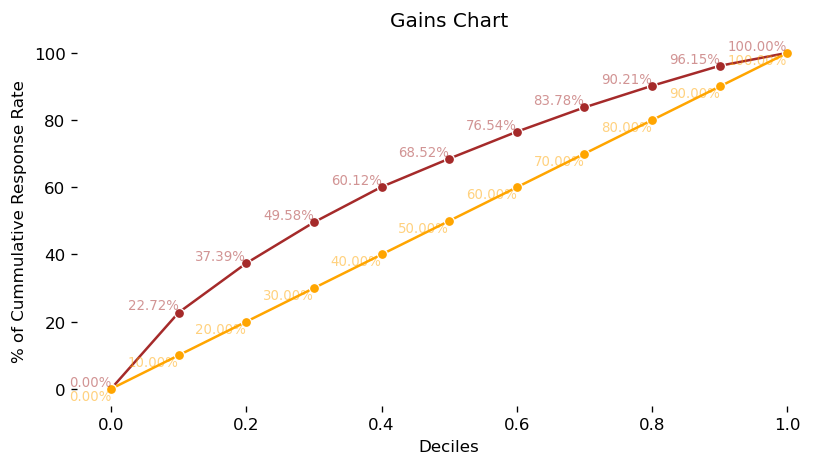

In [262]:
plt.figure(figsize=(8,4),dpi=120)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
sns.lineplot(x=(np.arange(0,1.1,.1)), y=cum_response_rate, marker='o',color='brown')
sns.lineplot(x=(np.arange(0,1.1,.1)), y=cum_rate, marker='o',color="orange")
plt.title('Gains Chart')
plt.xlabel('Deciles')
plt.ylabel('% of Cummulative Response Rate')

for x, y in zip(np.arange(0, 1.1, 0.1), cum_response_rate):
    plt.text(x, y, f'{y:.2f}%', ha='right', va='bottom', fontsize=8, color='brown',alpha=0.5)

for x, y in zip(np.arange(0, 1.1, 0.1), cum_rate):
    plt.text(x, y, f'{y:.2f}%', ha='right', va='top', fontsize=8, color='orange',alpha=0.5)

plt.show()

### Decile Chart

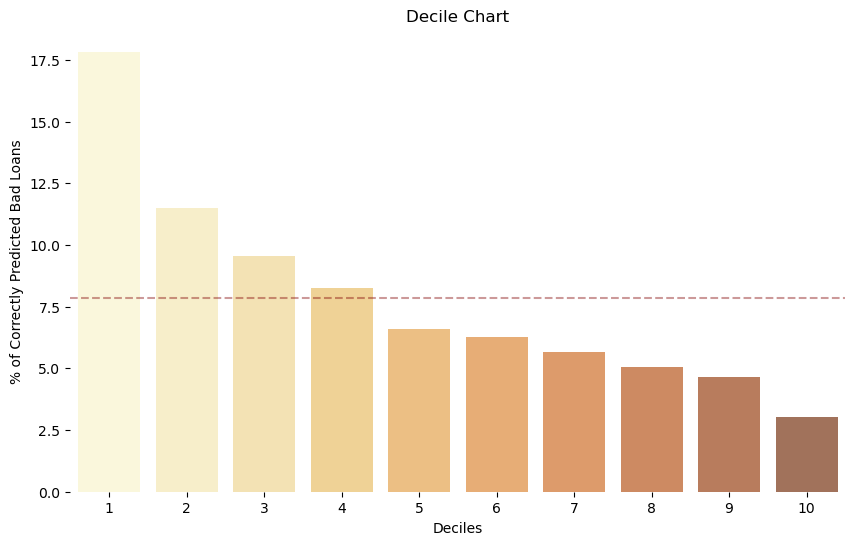

In [438]:
# Response Rate Chart
plt.figure(figsize=(10,6))

average_response_rate = gain['response_rate_percentage'].mean()

for spine in plt.gca().spines.values():
    spine.set_visible(False)

sns.barplot(x='decile', y='response_rate_percentage', data=gain,palette='YlOrBr',alpha=0.7)

plt.axhline(y=average_response_rate, color='maroon', alpha=0.4,linestyle='--', label=f'Average: {average_response_rate:.2f}%')

plt.title('Decile Chart')
plt.xlabel('Deciles')
plt.ylabel('% of Correctly Predicted Bad Loans')
plt.show()

In [264]:
gain['decile'].to_list()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [265]:
gain.lift[::-1]

9    1.000000
8    1.068385
7    1.127607
6    1.196782
5    1.275598
4    1.370429
3    1.502890
2    1.652675
1    1.869606
0    2.271967
Name: lift, dtype: float64

### Lift Curve

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


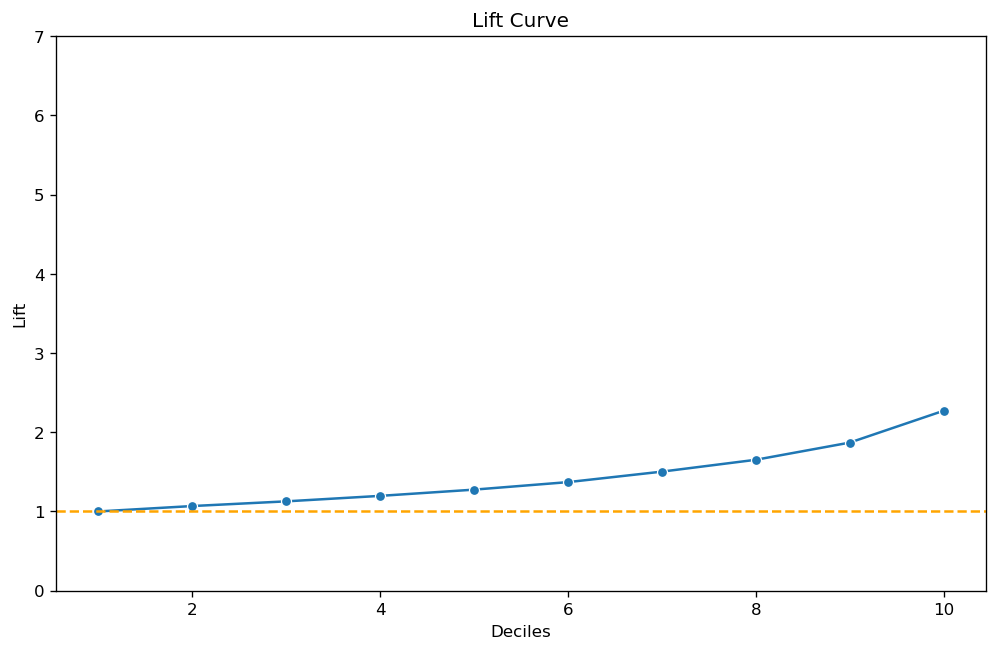

In [266]:
plt.figure(figsize=(10, 6),dpi=120)
sns.lineplot(x=gain['decile'].to_list(), y=gain.lift[::-1],marker='o')
plt.axhline(y=1, color='orange', linestyle='--')
plt.title('Lift Curve')
plt.ylim(0,7)
plt.xlabel('Deciles')
plt.ylabel('Lift')
plt.show()

#### Deciles for features

##### Feature 1

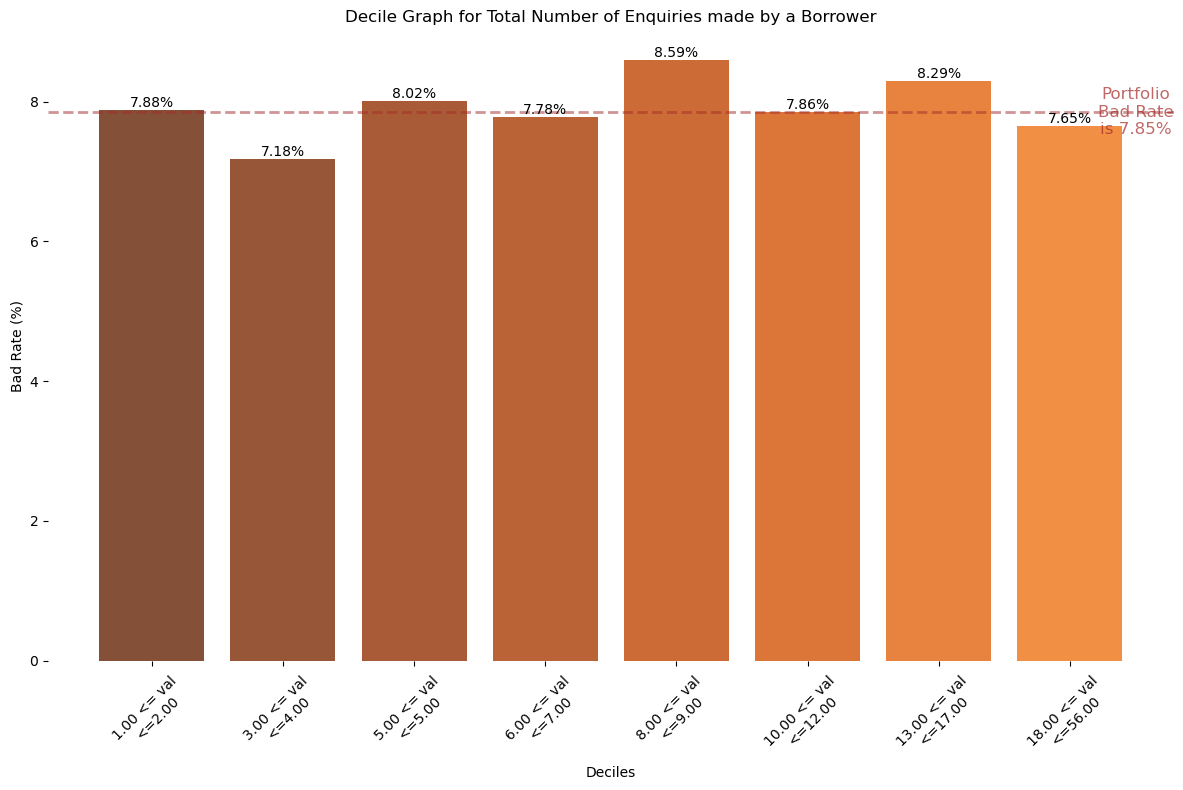

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, Formatter

# Assuming df_test, test_y, and feature_name are defined as per your context
feature_name = 'enqList_total_enquiries_per_customer'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df1 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df1.sort_values(by=feature_name)

df1['decile'] = pd.qcut(df1[feature_name], 10, labels=False, duplicates='drop')


decile_stats = df1.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df1.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df1['actual'].mean()

decile_limits = df1.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)
# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')


# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for Total Number of Enquiries made by a Borrower')
ax.set_xticks(decile_stats['decile'])
ax.set_xticklabels([f'{decile_limits.loc[d, "min"]:.2f} <= val \n<={decile_limits.loc[d, "max"]:.2f}' for d in decile_limits['decile']],rotation=45,ha='center')

# Show plot
plt.tight_layout()
plt.show()


##### Feature 2

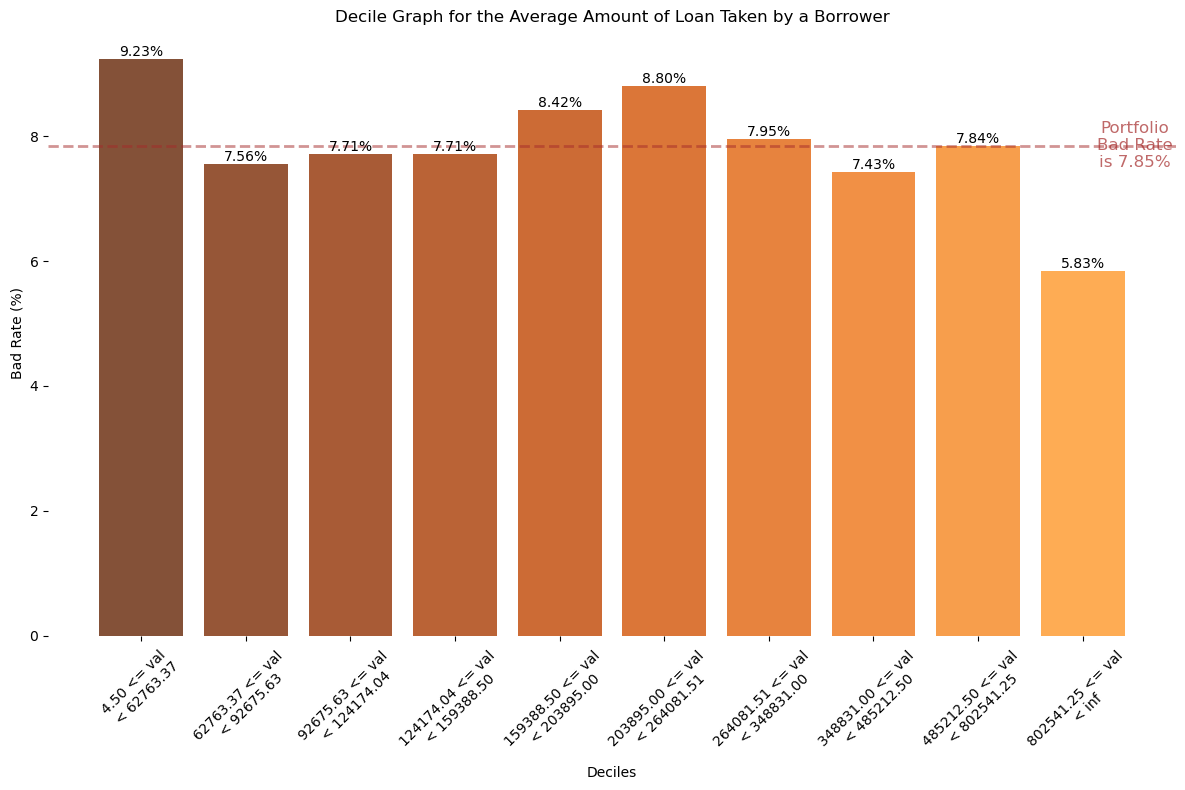

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_test, test_y, and feature_name are defined as per your context
feature_name = 'accList_avg_loan_amount'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df2.sort_values(by='accList_avg_loan_amount')

df2['decile'] = pd.qcut(df2[feature_name], 10, labels=False, duplicates='drop')

decile_limits = df2.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Add horizontal line for portfolio bad rate

ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')


# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for the Average Amount of Loan Taken by a Borrower')
ax.set_xticks(decile_stats['decile'])

def format_tick_label(d):
    current_max = decile_limits.loc[d, "max"]
    next_min = decile_limits.loc[d+1, "min"] if d < len(decile_limits)-1 else np.inf  # Handle last decile case
    return f'{decile_limits.loc[d, "min"]:.2f} <= val \n< {next_min:.2f}'

ax.set_xticklabels([format_tick_label(d) for d in decile_limits.index], rotation=45)


plt.tight_layout()
plt.show()


##### Feature 3

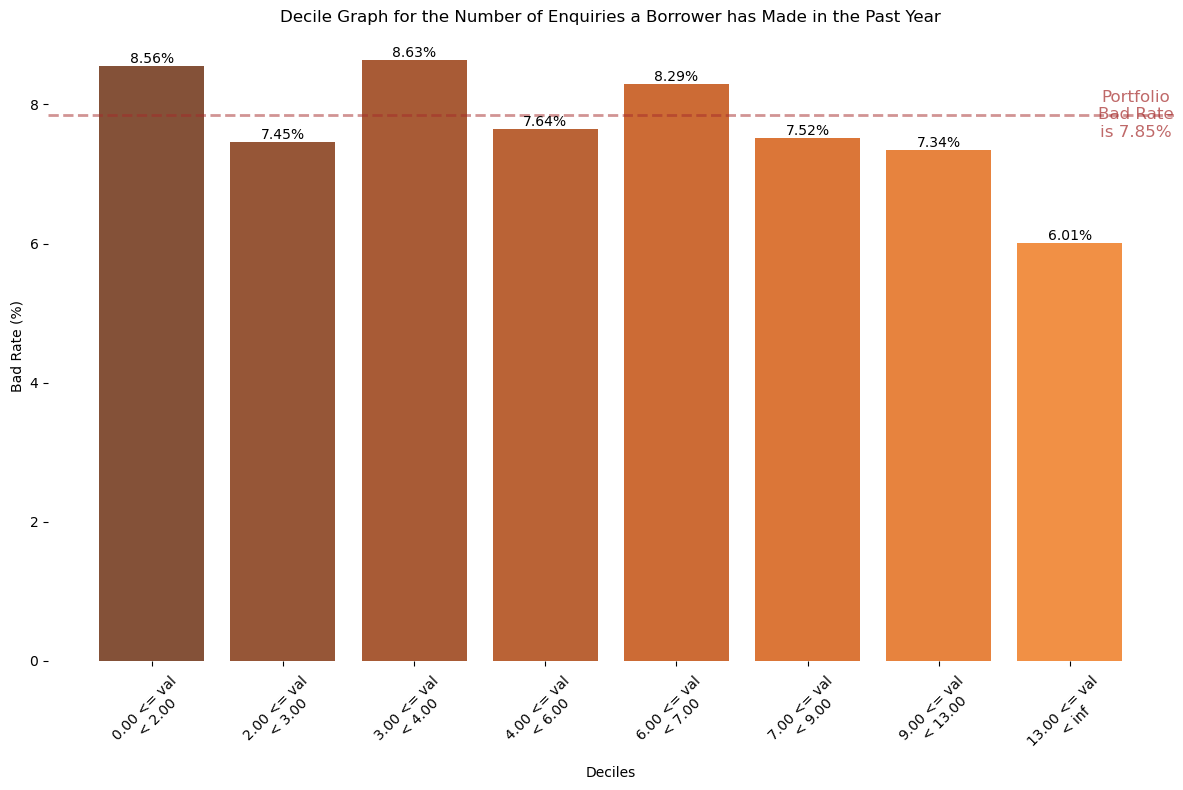

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_test, test_y, and feature_name are defined as per your context
feature_name = 'enqList_enquiries_last_year'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df2.sort_values(by=feature_name)

df2['decile'] = pd.qcut(df2[feature_name], 10, labels=False, duplicates='drop')

decile_limits = df2.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')

# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for the Number of Enquiries a Borrower has Made in the Past Year')
ax.set_xticks(decile_stats['decile'])

def format_tick_label(d):
    current_max = decile_limits.loc[d, "max"]
    next_min = decile_limits.loc[d+1, "min"] if d < len(decile_limits)-1 else np.inf  # Handle last decile case
    return f'{decile_limits.loc[d, "min"]:.2f} <= val \n< {next_min:.2f}'

ax.set_xticklabels([format_tick_label(d) for d in decile_limits.index], rotation=45)

#ax.set_xticklabels([f'{decile_limits.loc[d, "min"]:.2f} <= val \n<= {decile_limits.loc[d, "max"]:.2f}' for d in decile_limits['decile']], rotation=45)

# Show plot
plt.tight_layout()
plt.show()


##### Feature 4

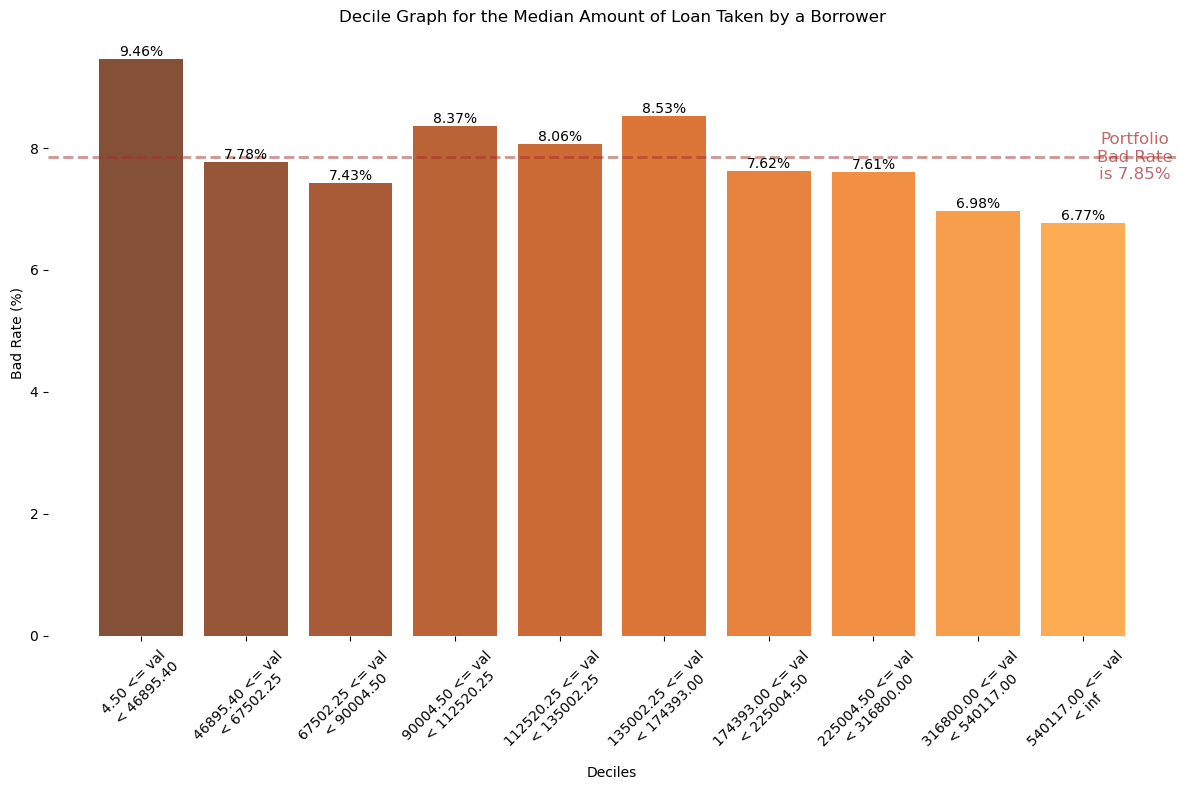

In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_name = 'accList_median_loan_amount'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df2.sort_values(by=feature_name)

df2['decile'] = pd.qcut(df2[feature_name], 10, labels=False, duplicates='drop')

decile_limits = df2.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')

# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for the Median Amount of Loan Taken by a Borrower')
ax.set_xticks(decile_stats['decile'])
def format_tick_label(d):
    current_max = decile_limits.loc[d, "max"]
    next_min = decile_limits.loc[d+1, "min"] if d < len(decile_limits)-1 else np.inf  # Handle last decile case
    return f'{decile_limits.loc[d, "min"]:.2f} <= val \n< {next_min:.2f}'

ax.set_xticklabels([format_tick_label(d) for d in decile_limits.index], rotation=45)

# Show plot
plt.tight_layout()
plt.show()


##### Feature 5

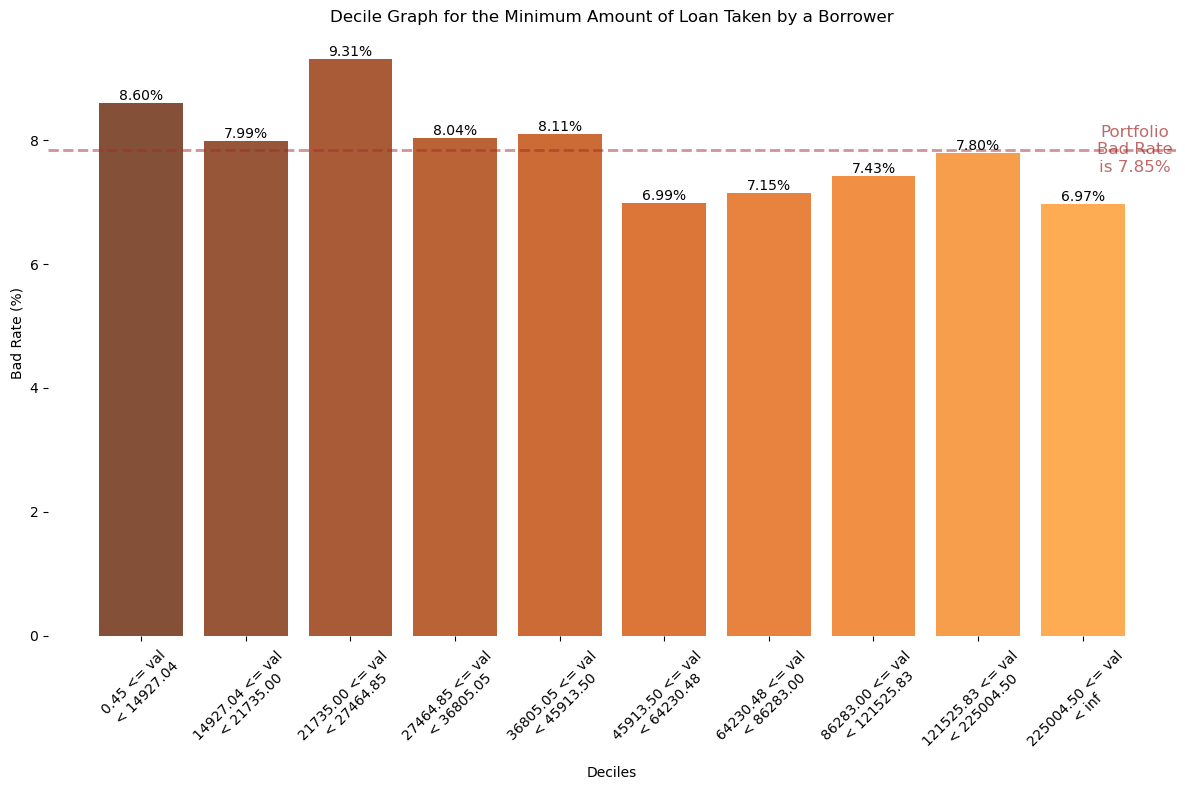

In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_name = 'accList_min_loan_amt'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df2.sort_values(by=feature_name)

df2['decile'] = pd.qcut(df2[feature_name], 10, labels=False, duplicates='drop')

decile_limits = df2.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')

# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for the Minimum Amount of Loan Taken by a Borrower')
ax.set_xticks(decile_stats['decile'])
def format_tick_label(d):
    current_max = decile_limits.loc[d, "max"]
    next_min = decile_limits.loc[d+1, "min"] if d < len(decile_limits)-1 else np.inf  # Handle last decile case
    return f'{decile_limits.loc[d, "min"]:.2f} <= val \n< {next_min:.2f}'

ax.set_xticklabels([format_tick_label(d) for d in decile_limits.index], rotation=45)
# Show plot
plt.tight_layout()
plt.show()


##### Feature 6

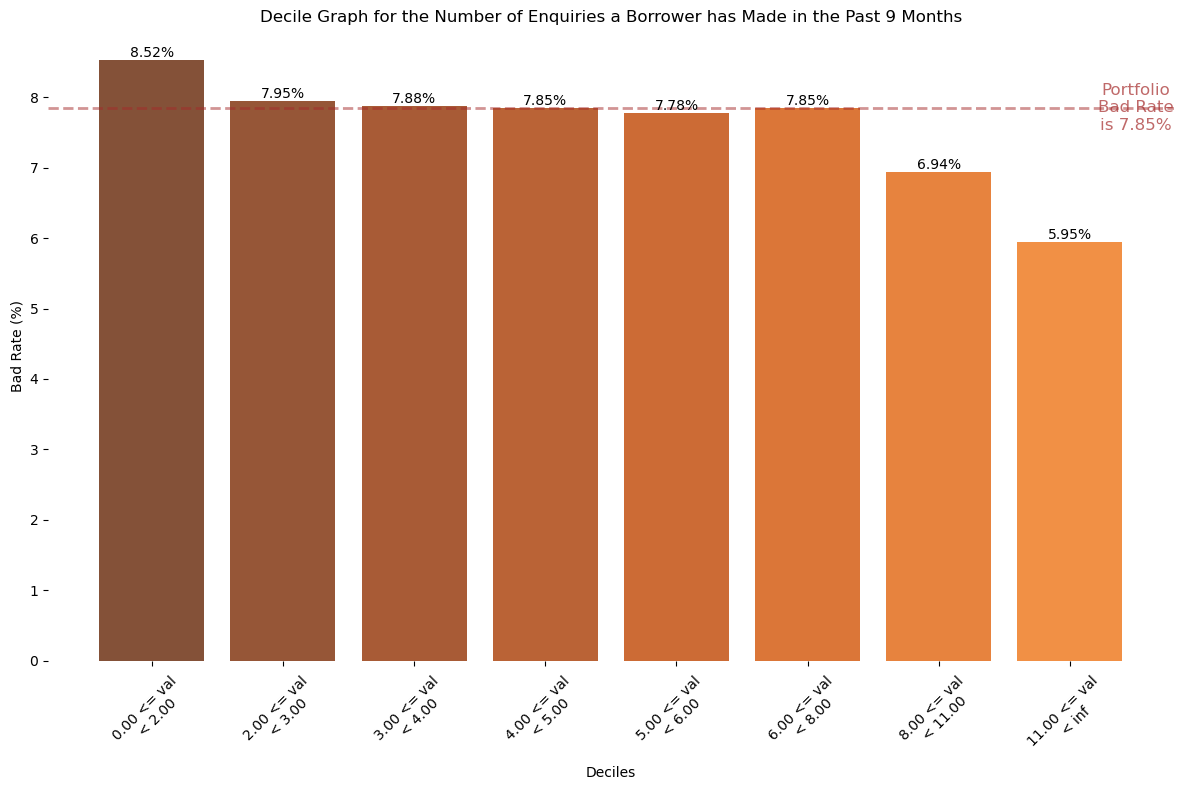

In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_name = 'enqList_enquiries_last_9_months'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df2.sort_values(by=feature_name)

df2['decile'] = pd.qcut(df2[feature_name], 10, labels=False, duplicates='drop')

decile_limits = df2.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')

# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for the Number of Enquiries a Borrower has Made in the Past 9 Months')
ax.set_xticks(decile_stats['decile'])
def format_tick_label(d):
    current_max = decile_limits.loc[d, "max"]
    next_min = decile_limits.loc[d+1, "min"] if d < len(decile_limits)-1 else np.inf  # Handle last decile case
    return f'{decile_limits.loc[d, "min"]:.2f} <= val \n< {next_min:.2f}'

ax.set_xticklabels([format_tick_label(d) for d in decile_limits.index], rotation=45)

# Show plot
plt.tight_layout()
plt.show()


##### Feature 7

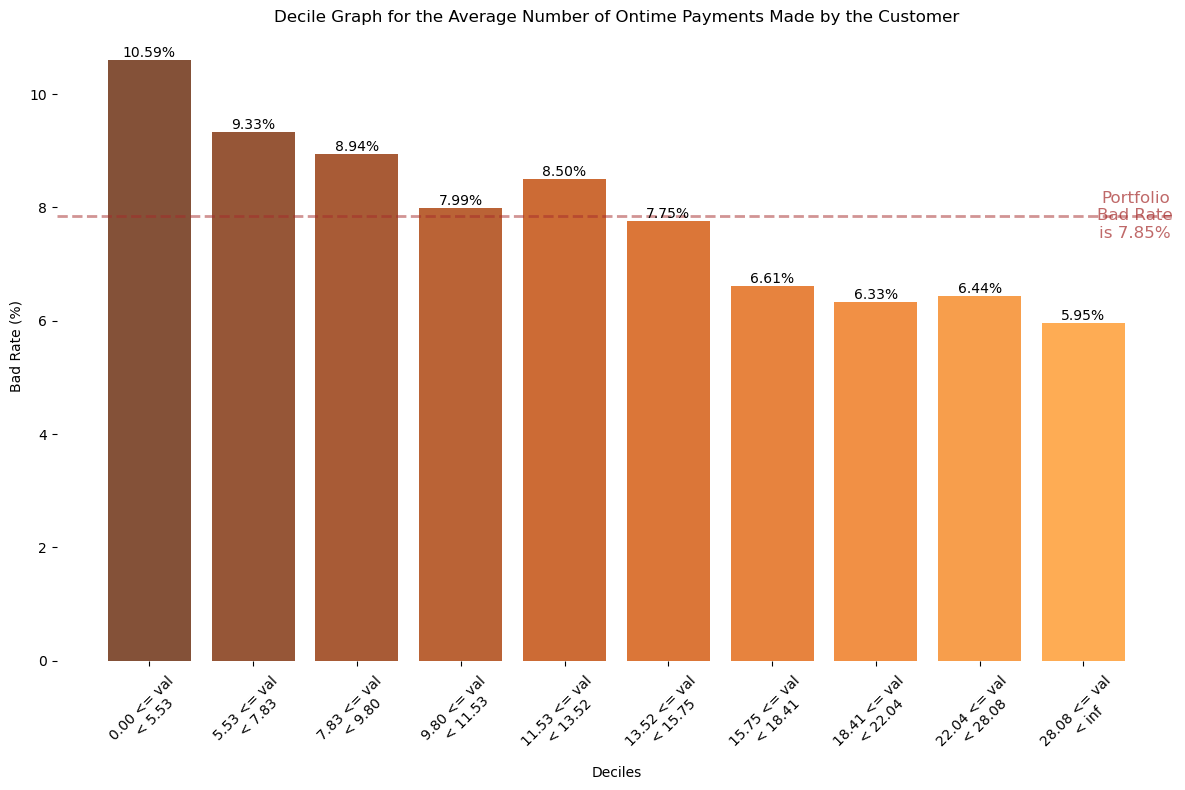

In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_name = 'accList_avg_ontime_payments'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df2.sort_values(by=feature_name)

df2['decile'] = pd.qcut(df2[feature_name], 10, labels=False, duplicates='drop')

decile_limits = df2.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')

# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for the Average Number of Ontime Payments Made by the Customer')
ax.set_xticks(decile_stats['decile'])
def format_tick_label(d):
    current_max = decile_limits.loc[d, "max"]
    next_min = decile_limits.loc[d+1, "min"] if d < len(decile_limits)-1 else np.inf  # Handle last decile case
    return f'{decile_limits.loc[d, "min"]:.2f} <= val \n< {next_min:.2f}'

ax.set_xticklabels([format_tick_label(d) for d in decile_limits.index], rotation=45)
plt.tight_layout()
plt.show()


##### Feature 8

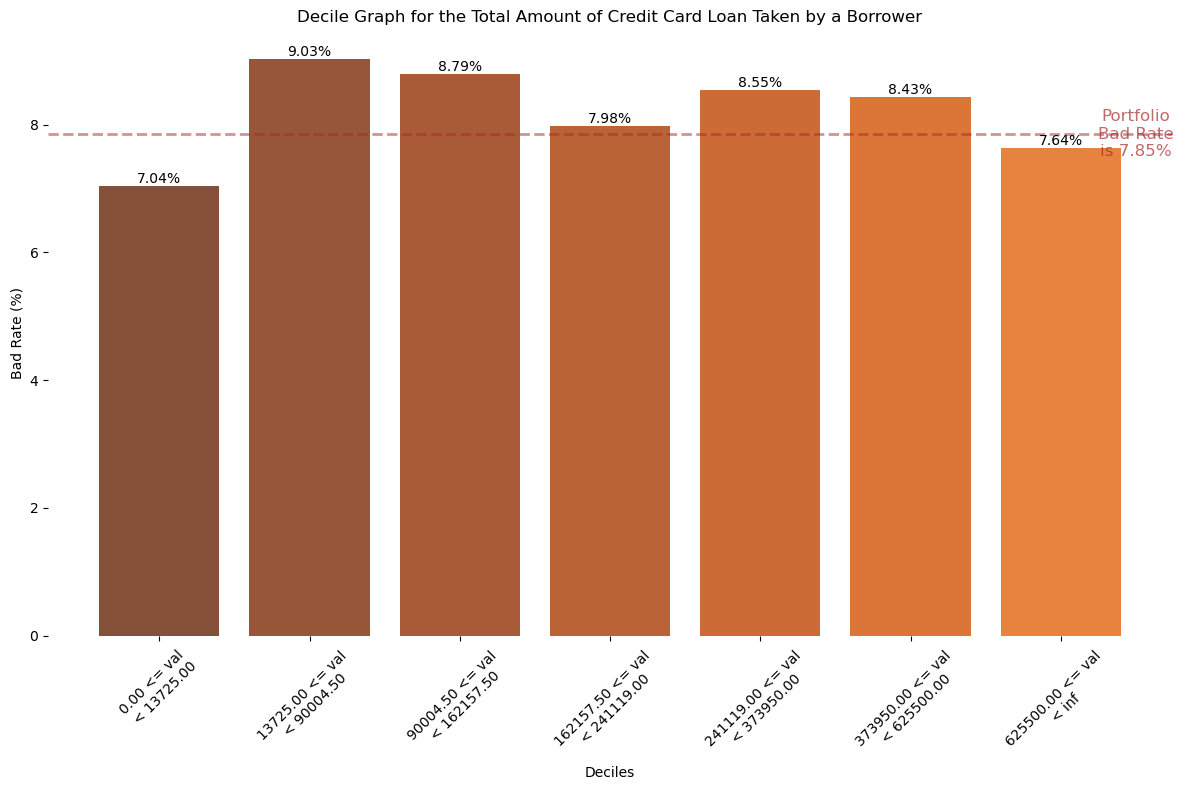

In [513]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_name = 'accList_Credit card_total_loan'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df2.sort_values(by=feature_name)

df2['decile'] = pd.qcut(df2[feature_name], 10, labels=False, duplicates='drop')

decile_limits = df2.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')

# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for the Total Amount of Credit Card Loan Taken by a Borrower')
ax.set_xticks(decile_stats['decile'])
def format_tick_label(d):
    current_max = decile_limits.loc[d, "max"]
    next_min = decile_limits.loc[d+1, "min"] if d < len(decile_limits)-1 else np.inf  # Handle last decile case
    return f'{decile_limits.loc[d, "min"]:.2f} <= val \n< {next_min:.2f}'

ax.set_xticklabels([format_tick_label(d) for d in decile_limits.index], rotation=45)

plt.tight_layout()
plt.show()


##### Feature 9

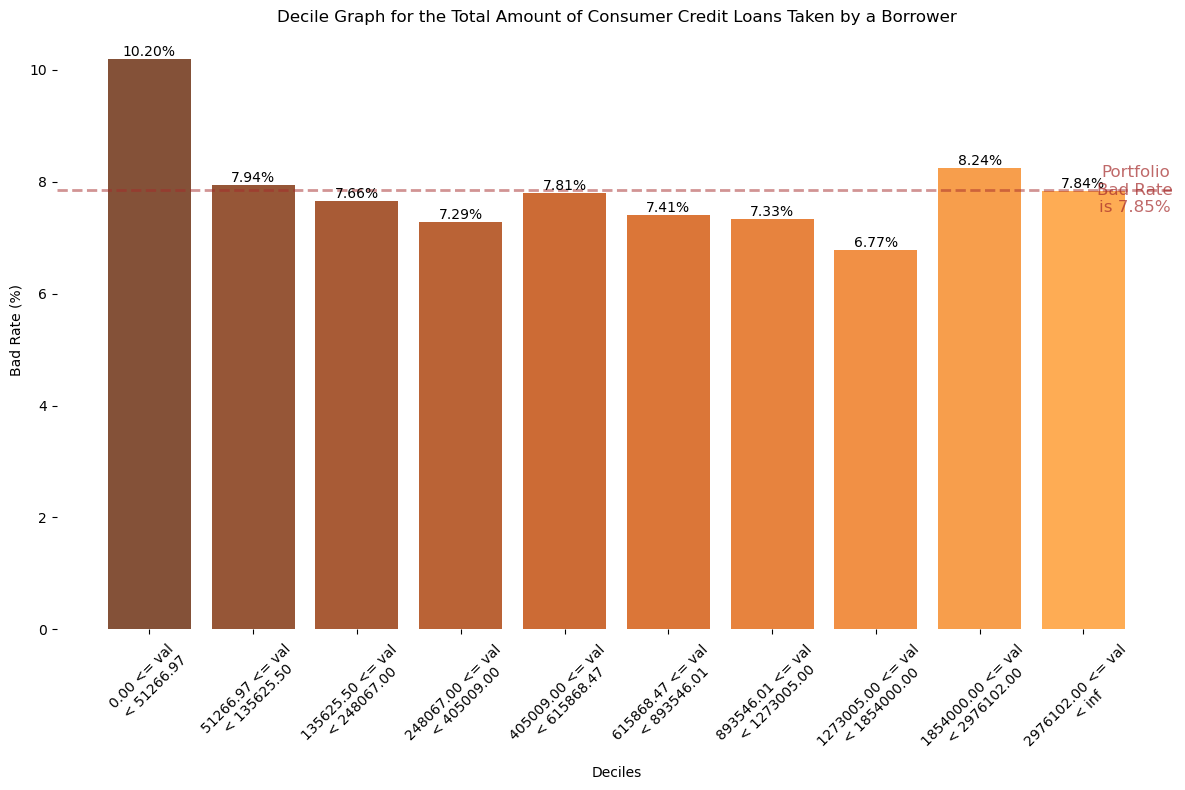

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_name = 'accList_Consumer credit_total_loan'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

df2.sort_values(by=feature_name)

df2['decile'] = pd.qcut(df2[feature_name], 10, labels=False, duplicates='drop')

decile_limits = df2.groupby('decile')[feature_name].agg(['min', 'max']).reset_index()

decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate the response rate for each decile
decile_stats = df2.groupby('decile').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats['decile'], decile_stats['bad_rate']*100, color=plt.cm.YlOrBr(np.linspace(1,0.5  ,10)),alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2,alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown',alpha=0.7, fontsize=12, va='center',ha='center')

# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title('Decile Graph for the Total Amount of Consumer Credit Loans Taken by a Borrower')
ax.set_xticks(decile_stats['decile'])
def format_tick_label(d):
    current_max = decile_limits.loc[d, "max"]
    next_min = decile_limits.loc[d+1, "min"] if d < len(decile_limits)-1 else np.inf  # Handle last decile case
    return f'{decile_limits.loc[d, "min"]:.2f} <= val \n< {next_min:.2f}'

ax.set_xticklabels([format_tick_label(d) for d in decile_limits.index], rotation=45)


plt.tight_layout()
plt.show()


##### Feature 10

In [519]:
d = df2[df2["accList_Mortgage_total_loan"]!=0]

In [520]:
d["accList_Mortgage_total_loan"].min()

225000.0

In [ ]:
#### Mortagage Fetaure - Outliers! 

/var/folders/9q/34twht415s37blhsfyy54d6w0000gn/T/ipykernel_2082/394060026.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_stats = df2.groupby('category').agg(


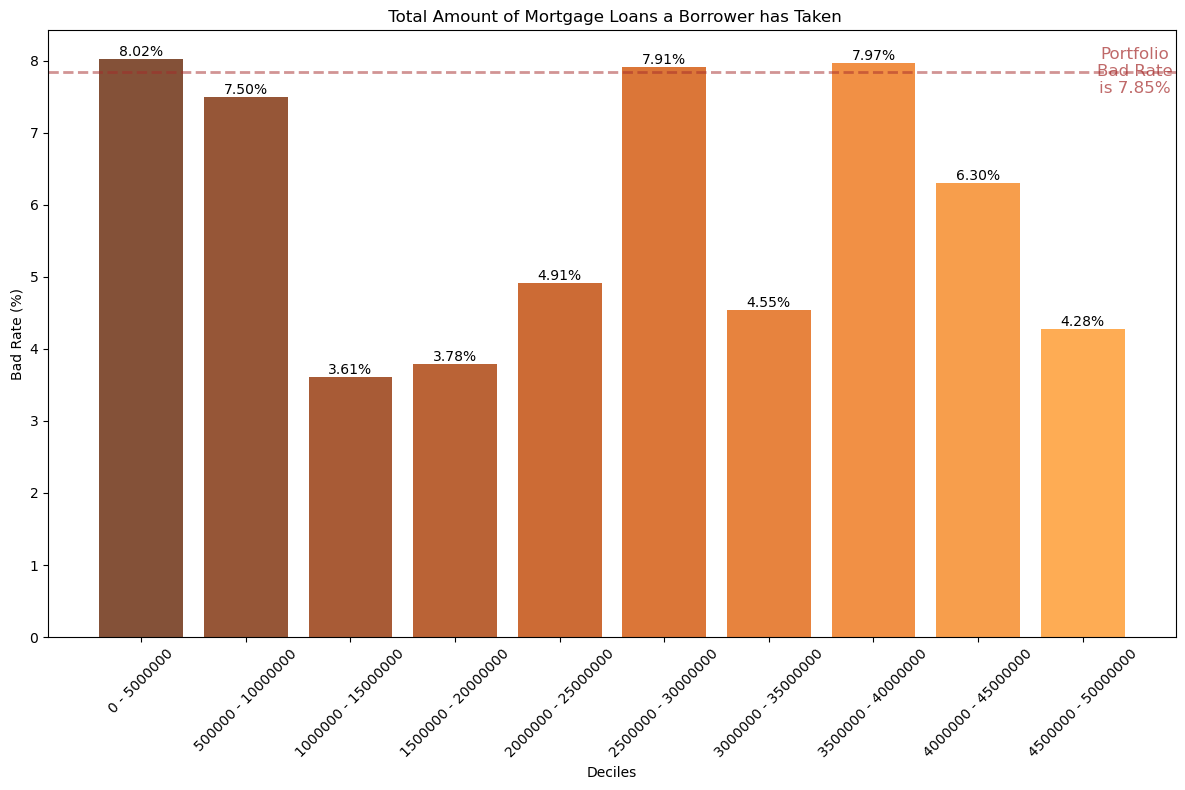

In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_test, test_y, and feature_name are defined as per your context
feature_name = 'accList_Mortgage_total_loan'

# Reset index of test_y if needed
test_y = test_y.reset_index(drop=True)

# Create DataFrame with actual outcomes and the specific feature
df2 = pd.DataFrame({'actual': test_y, feature_name: df_test[feature_name]})

# Sort the DataFrame by the feature_name
df2 = df2.sort_values(by=feature_name)

# Define mortgage total loan amount categories and bins
category_labels = [f'{i*500000} - {(i+1)*5000000}' for i in range(10)]
category_bins = [i*500000 for i in range(11)]

# Assign categories based on mortgage total loan amount
df2['category'] = pd.cut(df2[feature_name], bins=category_bins, labels=category_labels, right=False)

# Calculate decile statistics within each category
decile_stats = df2.groupby('category').agg(
    count=('actual', 'size'),
    bad_rate=('actual', 'mean')
).reset_index()

# Calculate overall portfolio bad rate
portfolio_bad_rate = df2['actual'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(decile_stats.index, decile_stats['bad_rate']*100, 
              color=plt.cm.YlOrBr(np.linspace(1, 0.5, len(category_labels))), alpha=0.8)

# Adding text for each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Add horizontal line for portfolio bad rate
ax.axhline(y=portfolio_bad_rate*100, color='brown', linestyle='--', linewidth=2, alpha=0.5)
ax.text(len(decile_stats)-0.5, portfolio_bad_rate*100, f'Portfolio\nBad Rate\nis {portfolio_bad_rate*100:.2f}%', 
        color='brown', alpha=0.7, fontsize=12, va='center', ha='center')

# Set labels and title
ax.set_xlabel('Deciles')
ax.set_ylabel('Bad Rate (%)')
ax.set_title(' Total Amount of Mortgage Loans a Borrower has Taken')

# Set x-axis ticks and labels
ax.set_xticks(range(len(category_labels)))
ax.set_xticklabels(category_labels, rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [543]:
df[df2["category"].isna()].sort_values(by='feature')

/var/folders/9q/34twht415s37blhsfyy54d6w0000gn/T/ipykernel_2082/1870514908.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df2["category"].isna()].sort_values(by='feature')


,feature,target,category
17309,5005530.0,0,Non-Dominant
19157,5023665.0,0,Non-Dominant
39331,5040000.0,0,Non-Dominant
12654,5040000.0,0,Non-Dominant
23130,5040000.0,0,Non-Dominant
...,...,...,...
29605,46800000.0,0,Non-Dominant
22807,55944000.0,0,Non-Dominant
38166,58032000.0,0,Non-Dominant
17016,59594400.0,0,Non-Dominant
